# Project Name: SCMS Global Delivery Data Analysis

### Project Type: Exploratory Data Analysis (EDA)


### Contribution: Individual

### **Team Member-**  **Swapna Yadav**

## Project Summary

This project involves an in-depth exploratory data analysis (EDA) of the SCMS (Supply Chain Management System) Global Delivery Dataset, aimed at understanding key delivery metrics across various countries, vendors, shipment modes, and other supply chain elements. The analysis is performed using **Python** in a **Jupyter Notebook** (Anaconda Environment), leveraging libraries like **Pandas**, **NumPy**, **Matplotlib**, **Seaborn**, and **Plotly** for data manipulation and visualization.

## Objective

The main objective is to uncover meaningful insights from the supply chain delivery data by analyzing delays, vendor performance, shipment methods, and value metrics such as Unit Price, Line Item Quantity, and Line Item Value. It also identifies missing values and performs data cleaning to ensure accuracy in visualizations and results.

## Tools and Libraries

- **Pandas & NumPy**: Data handling and preprocessing
- **Matplotlib & Seaborn**: Static visualizations
- **Plotly Express**: Interactive charts
- **Jupyter Notebook**: Documentation and execution environment

## Steps Followed

1. **Data Loading & Inspection**: Loaded the dataset with `pd.read_csv()`, explored structure with `.head()`, `.info()`, and `.describe()`.
2. **Data Cleaning**: Handled missing values, converted date columns to `datetime`, normalized categorical fields, and removed duplicates.
   
3.**Visualizations**
   - **Univariate Analysis**: Histograms, Box Plots, and Density Plots were used to examine the distribution of individual variables like `Line Item Value`, `Pack Price`, and `Quantity`.
     - **Histogram** helps identify the distribution and skewness of numerical variables.
     - **Box Plots** highlight the spread of data and identify any outliers.
     - **KDE Plots** provide a smoothed view of the data distribution.

   - **Bivariate Analysis**: Scatter Plots and Heatmaps were used to analyze relationships between two variables, such as `Line Item Value` and `Line Item Quantity`, or between different shipment modes and delivery time.
     - **Scatter Plots** reveal correlations or trends between two numerical variables.
     - **Heatmaps** show the correlation between various variables in a visually intuitive manner.

   - **Multivariate Analysis**: Pair Plots and Treemaps were utilized to examine how multiple variables interact. For example, a Pair Plot was used to explore relationships between different numerical variables, and a Treemap was employed to visualize hierarchical data such as `Country` → `Vendor`.

4. **Insights from EDA**
   - **Vendor and Country Performance**: Analysis of the total shipment value by country and vendor highlighted the most valuable countries and vendors, enabling strategic decisions for vendor negotiations and regional market focus.
   - **Shipment Mode Efficiency**: Comparing shipment modes across product categories identified opportunities to optimize logistics by balancing air and sea shipments based on cost and urgency.
   - **Inventory Optimization**: Insights into frequently ordered dosage forms and product groups facilitated better inventory forecasting, ensuring products are available in the right quantity at the right time.
   - **Outliers and Skewness**: The detection of outliers and skewed data patterns led to identifying potential inefficiencies and areas where adjustments could improve profitability.
    **Grouped Analyses**: Used `groupby()` for combinations like Country→Vendor and aggregated sums/means, visualized via stacked and radial charts.
## Key Insights

- **Regional Trends**: Countries like Nigeria and Kenya show high total Line Item Values, indicating significant procurement activity.
- **Vendor Performance**: Certain vendors consistently handle larger volumes or higher-value orders, suggesting potential bulk agreements.
- **Delivery Patterns**: Clusters in delivery dates reveal peak shipment periods and potential delays.
- **Shipment Modes**: Air shipments correlate with higher unit prices and faster deliveries, while sea shipments favor bulk, cost-effective transport.

## Business Impact

The insights support:
- **Vendor Management**: Prioritizing reliable vendors and negotiating better terms.
- **Cost Optimization**: Identifying expensive shipment methods and reducing freight costs.
- **Operational Efficiency**: Streamlining delivery processes and resource allocation to minimize delays and improve service quality.

# **GitHub Link -**

You can view the complete project on GitHub here:  
[SCMS Global Delivery Data Analysis on GitHub](https://github.com/yadav819/SCMS-Global-Delivery-Data-Analysis)


# **Problem Statement**

### 🧾 Problem Statement Here 

The SCMS (Supply Chain Management System) organization is responsible for delivering healthcare-related products across various countries. However, analyzing and understanding the large volume of delivery data is crucial for identifying delays, improving shipment efficiency, managing vendors, and minimizing costs.

This project aims to perform exploratory data analysis (EDA) on the SCMS Global Delivery dataset to uncover key patterns, trends, and insights related to shipment modes, delivery timelines, vendors, products, and costs. The analysis will support better decision-making in optimizing global delivery operations.

#### **Define Your Business Objective?**

The primary business objective of this project is to analyze the global delivery operations data of SCMS to:

- Identify factors causing delivery delays.
- Understand the performance of vendors and shipment modes.
- Track and optimize shipping costs like freight and insurance.
- Analyze product distribution across countries and shipment timelines.
- Provide actionable insights for improving the efficiency, timeliness, and cost-effectiveness of deliveries.

By achieving these objectives, the organization can enhance its overall supply chain efficiency, improve service delivery, and reduce operational risks and costs.

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Dataset Loading

In [2]:
# Load Dataset
file_path = r"C:\Users\Atharva\Downloads\SCMS_Delivery_History_Dataset.csv"
df = pd.read_csv(file_path)


### Display First 5 Rows

In [54]:
# Dataset First Look
df.head()


ID Project Code            PQ # PO / SO # ASN/DN #        Country  \
0   1   100-CI-T01  Pre-PQ Process    SCMS-4    ASN-8  Côte d'Ivoire   
1   3   108-VN-T01  Pre-PQ Process   SCMS-13   ASN-85        Vietnam   
2   4   100-CI-T01  Pre-PQ Process   SCMS-20   ASN-14  Côte d'Ivoire   
3  15   108-VN-T01  Pre-PQ Process   SCMS-78   ASN-50        Vietnam   
4  16   108-VN-T01  Pre-PQ Process   SCMS-81   ASN-55        Vietnam   

  Managed By  Fulfill Via Vendor INCO Term Shipment Mode  ...  \
0   PMO - US  Direct Drop              EXW           Air  ...   
1   PMO - US  Direct Drop              EXW           Air  ...   
2   PMO - US  Direct Drop              FCA           Air  ...   
3   PMO - US  Direct Drop              EXW           Air  ...   
4   PMO - US  Direct Drop              EXW           Air  ...   

  Unit of Measure (Per Pack) Line Item Quantity Line Item Value Pack Price  \
0                         30                 19           551.0      29.00   
1                        240               1000          6200.0       6.20   
2                        100                500         40000.0      80.00   
3                         60              31920        127360.8       3.99   
4                         60              38000        121600.0       3.20   

  Unit Price             Manufacturing Site First Line Designation  \
0       0.97     Ranbaxy Fine Chemicals LTD                    Yes   
1       0.03      Aurobindo Unit III, India                    Yes   
2       0.80  ABBVIE GmbH & Co.KG Wiesbaden                    Yes   
3       0.07  Ranbaxy, Paonta Shahib, India                    Yes   
4       0.05      Aurobindo Unit III, India                    Yes   

  Weight (Kilograms) Freight Cost (USD) Line Item Insurance (USD)  
0                 13             780.34                       NaN  
1                358             4521.5                       NaN  
2                171            1653.78                       NaN  
3               1855           16007.06                       NaN  
4               7590           45450.08                       NaN  

[5 rows x 33 columns]

### Dataset Rows & Columns count

In [66]:
# Dataset Rows & Columns count
print("Rows & Columns:", df.shape)

Rows & Columns: (10324, 33)


### Display Last 5 Rows

In [53]:
df.tail()

ID Project Code       PQ # PO / SO # ASN/DN #        Country  \
10319  86818   103-ZW-T30  FPQ-15197  SO-50020  DN-4307       Zimbabwe   
10320  86819   104-CI-T30  FPQ-15259  SO-50102  DN-4313  Côte d'Ivoire   
10321  86821   110-ZM-T30  FPQ-14784  SO-49600  DN-4316         Zambia   
10322  86822   200-ZW-T30  FPQ-16523  SO-51680  DN-4334       Zimbabwe   
10323  86823   103-ZW-T30  FPQ-15197  SO-50022  DN-4336       Zimbabwe   

      Managed By Fulfill Via Vendor INCO Term Shipment Mode  ...  \
10319   PMO - US    From RDC   N/A - From RDC         Truck  ...   
10320   PMO - US    From RDC   N/A - From RDC         Truck  ...   
10321   PMO - US    From RDC   N/A - From RDC         Truck  ...   
10322   PMO - US    From RDC   N/A - From RDC         Truck  ...   
10323   PMO - US    From RDC   N/A - From RDC         Truck  ...   

      Unit of Measure (Per Pack) Line Item Quantity Line Item Value  \
10319                         60             166571       599655.60   
10320                         60              21072       137389.44   
10321                         30             514526      5140114.74   
10322                         60              17465       113871.80   
10323                         60              36639        72911.61   

      Pack Price Unit Price              Manufacturing Site  \
10319       3.60       0.06      Mylan,  H-12 & H-13, India   
10320       6.52       0.11    Hetero Unit III Hyderabad IN   
10321       9.99       0.33   Cipla Ltd A-42 MIDC Mahar. IN   
10322       6.52       0.11  Mylan (formerly Matrix) Nashik   
10323       1.99       0.03               Cipla, Goa, India   

      First Line Designation          Weight (Kilograms)  \
10319                     No     See DN-4307 (ID#:83920)   
10320                     No     See DN-4313 (ID#:83921)   
10321                     No  Weight Captured Separately   
10322                    Yes                        1392   
10323                     No  Weight Captured Separately   

                       Freight Cost (USD) Line Item Insurance (USD)  
10319             See DN-4307 (ID#:83920)                    705.79  
10320             See DN-4313 (ID#:83921)                    161.71  
10321  Freight Included in Commodity Cost                   5284.04  
10322  Freight Included in Commodity Cost                    134.03  
10323  Freight Included in Commodity Cost                     85.82  

[5 rows x 33 columns]

### Dataset Information

In [9]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10324 entries, 0 to 10323
Data columns (total 33 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            10324 non-null  int64  
 1   Project Code                  10324 non-null  object 
 2   PQ #                          10324 non-null  object 
 3   PO / SO #                     10324 non-null  object 
 4   ASN/DN #                      10324 non-null  object 
 5   Country                       10324 non-null  object 
 6   Managed By                    10324 non-null  object 
 7   Fulfill Via                   10324 non-null  object 
 8   Vendor INCO Term              10324 non-null  object 
 9   Shipment Mode                 9964 non-null   object 
 10  PQ First Sent to Client Date  10324 non-null  object 
 11  PO Sent to Vendor Date        10324 non-null  object 
 12  Scheduled Delivery Date       10324 non-null  object 
 13  D

#### Duplicate Values

In [55]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

### Check null values:

In [56]:
#Check null values
df.isnull().sum()


ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date       0
PO Sent to Vendor Date             0
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

### Missing Values/Null Values Count

In [57]:
df.isnull().sum().sum()

2383

### Visualizing the missing values

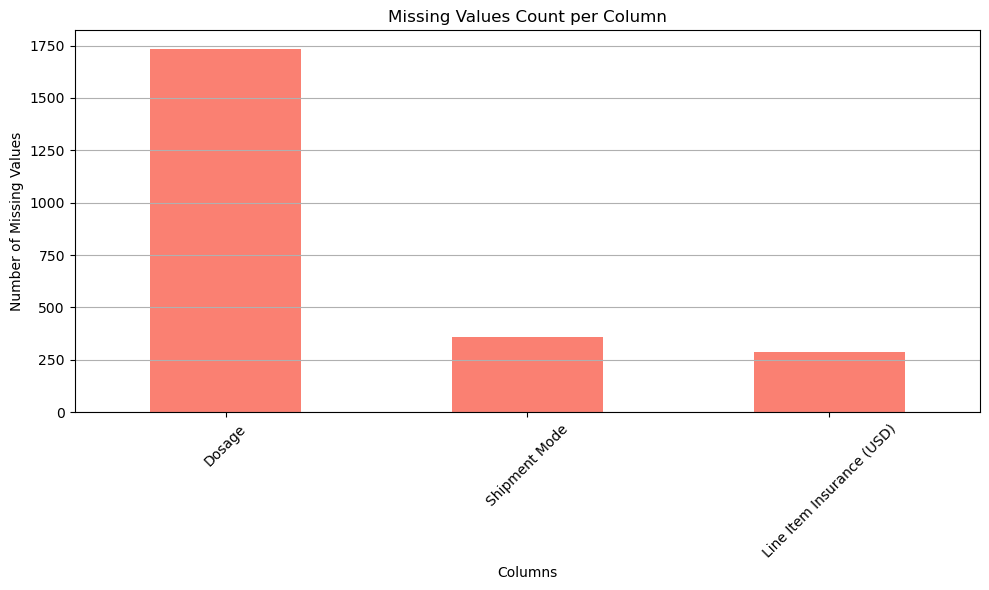

In [6]:
# Missing value count per column
missing_data = df.isnull().sum()
missing_data = missing_data[missing_data > 0].sort_values(ascending=False)

# Bar plot
plt.figure(figsize=(10, 6))
missing_data.plot(kind='bar', color='salmon')
plt.title("Missing Values Count per Column")
plt.xlabel("Columns")
plt.ylabel("Number of Missing Values")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### What did you know about your dataset?

The dataset used for this project belongs to SCMS (Supply Chain Management System) and contains detailed information about global deliveries. It includes 33 columns and over 1000+ rows covering various aspects such as:
- **Shipment details**: PO Number, Project Code, Shipment Mode, Delivery Dates.
- **Product information**: Product Group, Item Description, Dosage Form, Unit of Measure.
- **Financial data**: Unit Price, Line Item Value, Freight Cost, Insurance Cost.
- **Geographical details**: Country, Vendor, Manufacturing Site.
- **Timeline tracking**: PO Sent Date, Scheduled Delivery Date, Delivered Date, etc.

This dataset helps in understanding the performance of the global supply chain by analyzing trends, delays, cost distribution, and vendor efficiency.


## ***2. Understanding Your Variables***

In [8]:
# Dataset Columns
df.columns

Index(['ID', 'Project Code', 'PQ #', 'PO / SO #', 'ASN/DN #', 'Country',
       'Managed By', 'Fulfill Via', 'Vendor INCO Term', 'Shipment Mode',
       'PQ First Sent to Client Date', 'PO Sent to Vendor Date',
       'Scheduled Delivery Date', 'Delivered to Client Date',
       'Delivery Recorded Date', 'Product Group', 'Sub Classification',
       'Vendor', 'Item Description', 'Molecule/Test Type', 'Brand', 'Dosage',
       'Dosage Form', 'Unit of Measure (Per Pack)', 'Line Item Quantity',
       'Line Item Value', 'Pack Price', 'Unit Price', 'Manufacturing Site',
       'First Line Designation', 'Weight (Kilograms)', 'Freight Cost (USD)',
       'Line Item Insurance (USD)'],
      dtype='object')

# Dataset Describe

In [7]:
df.describe()


ID  Unit of Measure (Per Pack)  Line Item Quantity  \
count  10324.000000                10324.000000        10324.000000   
mean   51098.968229                   77.990895        18332.534870   
std    31944.332496                   76.579764        40035.302961   
min        1.000000                    1.000000            1.000000   
25%    12795.750000                   30.000000          408.000000   
50%    57540.500000                   60.000000         3000.000000   
75%    83648.250000                   90.000000        17039.750000   
max    86823.000000                 1000.000000       619999.000000   

       Line Item Value    Pack Price    Unit Price  Line Item Insurance (USD)  
count     1.032400e+04  10324.000000  10324.000000               10037.000000  
mean      1.576506e+05     21.910241      0.611701                 240.117626  
std       3.452921e+05     45.609223      3.275808                 500.190568  
min       0.000000e+00      0.000000      0.000000                   0.000000  
25%       4.314593e+03      4.120000      0.080000                   6.510000  
50%       3.047147e+04      9.300000      0.160000                  47.040000  
75%       1.664471e+05     23.592500      0.470000                 252.400000  
max       5.951990e+06   1345.640000    238.650000                7708.440000

### Variables Description

### 📌 Variables Description

Below is a brief description of the key variables present in the SCMS dataset:

- **ID**: Unique identifier for each entry.
- **Project Code**: Code representing a specific SCMS project.
- **PQ # / PO / SO # / ASN/DN #**: Different procurement and shipment reference numbers.
- **Country**: Destination country for the delivery.
- **Managed By**: Name of the managing entity or team.
- **Fulfill Via**: Fulfillment channel or mode.
- **Vendor INCO Term**: Terms of delivery agreed upon with the vendor.
- **Shipment Mode**: Mode of transport (Air, Sea, Truck, etc.).
- **PQ First Sent to Client Date**: Date when the product quotation was first sent to the client.
- **PO Sent to Vendor Date**: Date when the purchase order was sent to the vendor.
- **Scheduled Delivery Date**: Planned delivery date.
- **Delivered to Client Date**: Actual date when product was delivered to the client.
- **Delivery Recorded Date**: When the delivery was logged into the system.
- **Product Group / Sub Classification**: Category and sub-category of the product.
- **Vendor**: Supplier providing the product.
- **Item Description / Molecule / Brand / Dosage / Dosage Form**: Detailed information about the product type and format.
- **Unit of Measure (Per Pack)**: Number of units per pack.
- **Line Item Quantity**: Quantity ordered for each line item.
- **Line Item Value**: Total value of each line item.
- **Pack Price / Unit Price**: Price per pack and per unit.
- **Manufacturing Site**: Location where the product was manufactured.
- **First Line Designation**: Internal priority or designation.
- **Weight (Kilograms)**: Shipment weight.
- **Freight Cost (USD)**: Shipping cost.
- **Line Item Insurance (USD)**: Insurance cost for the shipment.

These variables are used to perform deep exploratory analysis to derive business insights, identify bottlenecks, and track delivery performance.


### Check Unique Values for each variable.

In [10]:
# Check Unique Values for each variable.
# Check unique values for each column
for column in df.columns:
    print(f"Unique values in {column}: {df[column].unique()[:10]}")  # Display first 10 unique values for each column
    print(f"Total unique values in {column}: {df[column].nunique()}")
    print("-" * 50)

Unique values in ID: [ 1  3  4 15 16 23 44 45 46 47]
Total unique values in ID: 10324
--------------------------------------------------
Unique values in Project Code: ['100-CI-T01' '108-VN-T01' '112-NG-T01' '110-ZM-T01' '109-TZ-T01'
 '102-NG-T01' '107-RW-T01' '106-HT-T01' '113-ZW-T01' '104-CI-T01']
Total unique values in Project Code: 142
--------------------------------------------------
Unique values in PQ #: ['Pre-PQ Process' 'FPQ-4587' 'FPQ-12051' 'FPQ-14827' 'FPQ-9066'
 'FPQ-11754' 'FPQ-15276' 'FPQ-11670' 'FPQ-9231' 'FPQ-8671']
Total unique values in PQ #: 1237
--------------------------------------------------
Unique values in PO / SO #: ['SCMS-4' 'SCMS-13' 'SCMS-20' 'SCMS-78' 'SCMS-81' 'SCMS-87' 'SCMS-139'
 'SCMS-140' 'SCMS-156' 'SCMS-165']
Total unique values in PO / SO #: 6233
--------------------------------------------------
Unique values in ASN/DN #: ['ASN-8' 'ASN-85' 'ASN-14' 'ASN-50' 'ASN-55' 'ASN-57' 'ASN-130' 'ASN-94'
 'ASN-93' 'ASN-199']
Total unique values in ASN/DN 

## 3. ***Data Wrangling***

### Check for Duplicate Records

In [9]:
df.duplicated().sum()


0

## Missing Values/Null Values

In [67]:
# Missing Values/Null Values Count
df.isnull().sum().sum()


8413

## Get Percentage of Missing Data

In [16]:
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent.sort_values(ascending=False)


Dosage                          16.815188
Shipment Mode                    3.487021
Line Item Insurance (USD)        2.779930
Molecule/Test Type               0.000000
Brand                            0.000000
Dosage Form                      0.000000
Unit of Measure (Per Pack)       0.000000
Line Item Quantity               0.000000
Line Item Value                  0.000000
Vendor                           0.000000
Pack Price                       0.000000
Unit Price                       0.000000
Manufacturing Site               0.000000
First Line Designation           0.000000
Weight (Kilograms)               0.000000
Freight Cost (USD)               0.000000
Item Description                 0.000000
ID                               0.000000
Project Code                     0.000000
Product Group                    0.000000
Delivery Recorded Date           0.000000
Delivered to Client Date         0.000000
Scheduled Delivery Date          0.000000
PO Sent to Vendor Date           0

## Show Data Type

In [19]:
df.dtypes

ID                                int64
Project Code                     object
PQ #                             object
PO / SO #                        object
ASN/DN #                         object
Country                          object
Managed By                       object
Fulfill Via                      object
Vendor INCO Term                 object
Shipment Mode                    object
PQ First Sent to Client Date     object
PO Sent to Vendor Date           object
Scheduled Delivery Date          object
Delivered to Client Date         object
Delivery Recorded Date           object
Product Group                    object
Sub Classification               object
Vendor                           object
Item Description                 object
Molecule/Test Type               object
Brand                            object
Dosage                           object
Dosage Form                      object
Unit of Measure (Per Pack)        int64
Line Item Quantity                int64


## Converting Columns to Date Format

In [35]:
df['PQ First Sent to Client Date'] = pd.to_datetime(df['PQ First Sent to Client Date'])
df['PO Sent to Vendor Date'] = pd.to_datetime(df['PO Sent to Vendor Date'])
df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'])
df['Delivered to Client Date'] = pd.to_datetime(df['Delivered to Client Date'])
df['Delivery Recorded Date'] = pd.to_datetime(df['Delivery Recorded Date'])


In [36]:
df.dtypes


ID                                       int64
Project Code                            object
PQ #                                    object
PO / SO #                               object
ASN/DN #                                object
Country                                 object
Managed By                              object
Fulfill Via                             object
Vendor INCO Term                        object
Shipment Mode                           object
PQ First Sent to Client Date    datetime64[ns]
PO Sent to Vendor Date          datetime64[ns]
Scheduled Delivery Date         datetime64[ns]
Delivered to Client Date        datetime64[ns]
Delivery Recorded Date          datetime64[ns]
Product Group                           object
Sub Classification                      object
Vendor                                  object
Item Description                        object
Molecule/Test Type                      object
Brand                                   object
Dosage       

## Cleaning and Converting Date Column

In [25]:
# First replace non-date strings with NaT (missing date)
df['PQ First Sent to Client Date'] = df['PQ First Sent to Client Date'].replace(
    ['Date Not Captured', 'Pre-PQ Process'], pd.NaT
)

# Now convert the column to proper datetime
df['PQ First Sent to Client Date'] = pd.to_datetime(df['PQ First Sent to Client Date'])


## Verifying Column Data Type

In [22]:
df['PQ First Sent to Client Date'].dtypes


dtype('<M8[ns]')

## Count of Null (Missing) Values in 'PQ First Sent to Client Date' Column

In [23]:
df['PQ First Sent to Client Date'].isnull().sum()


2681

## Cleaning and Converting 'PO Sent to Vendor Date' to Datetime Format

In [33]:
df['PO Sent to Vendor Date'] = df['PO Sent to Vendor Date'].replace(
    ['Date Not Captured', 'N/A From RCD', 'N/A - From RDC'], pd.NaT
)

df['PO Sent to Vendor Date'] = pd.to_datetime(df['PO Sent to Vendor Date'])


## Verifying Column Data Type

In [31]:
df['PO Sent to Vendor Date'].dtypes


dtype('<M8[ns]')

## Counting Missing Values in 'PO Sent to Vendor Date' Column

In [32]:
df['PO Sent to Vendor Date'].isnull().sum()


5732

##  Replace with a default value like "Unknown"

In [8]:
df['Shipment Mode'] = df['Shipment Mode'].replace('N/A', 'Unknown')


## Frequency Count of Shipment Mode Including Missing Values

In [38]:
df['Shipment Mode'].value_counts(dropna=False)


Shipment Mode
Air            6113
Truck          2830
Air Charter     650
Ocean           371
NaN             360
Name: count, dtype: int64

##  Replace "N/A" in Dosage Column

In [39]:
df['Dosage'] = df['Dosage'].replace('N/A', 'Unknown')


## Frequency Distribution of Dosage Values (Including Missing Values)

In [7]:
df['Dosage'].value_counts(dropna=False)


Dosage
NaN                1736
300mg               990
200mg               932
600mg               772
150/300mg           600
150/300/200mg       580
10mg/ml             552
150mg               431
200/50mg            395
300/300mg           301
600/300/300mg       286
150/200/30mg        250
100mg               228
50mg                174
200/300mg           160
80/20mg/ml          158
400mg               156
20mg/ml             152
30mg                144
600/200/300mg       139
150/30mg            133
30/50/60mg          127
300/200mg            94
30/60mg              89
250mg                88
60/30mg              73
100/25mg             73
600/300mg            63
300/100mg            54
1mg/ml               54
20mg                 43
25mg                 39
15mg                 38
30mg/ml              33
300/150/300mg        28
30/50/6mg            19
30/6mg               14
500/25mg             13
80mg/ml              13
20/120mg             12
60/100/12mg          12
2g       

## Check Data Type

In [41]:
df['Line Item Insurance (USD)'].dtypes


dtype('float64')

## Cleaning and Converting ‘Line Item Insurance (USD)’ to Numeric Format

In [43]:
df['Line Item Insurance (USD)'] = pd.to_numeric(df['Line Item Insurance (USD)'], errors='coerce')


In [45]:
# Convert to numeric and handle any non-numeric values by turning them into NaN
df['Line Item Insurance (USD)'] = pd.to_numeric(df['Line Item Insurance (USD)'], errors='coerce')

# Replace NaN values with 0.0 directly
df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(0.0)


In [46]:
df['Line Item Insurance (USD)'].isnull().sum()  # Should show 0 after replacement


0

In [47]:
df.isnull().sum()

ID                                 0
Project Code                       0
PQ #                               0
PO / SO #                          0
ASN/DN #                           0
Country                            0
Managed By                         0
Fulfill Via                        0
Vendor INCO Term                   0
Shipment Mode                    360
PQ First Sent to Client Date    2681
PO Sent to Vendor Date          5732
Scheduled Delivery Date            0
Delivered to Client Date           0
Delivery Recorded Date             0
Product Group                      0
Sub Classification                 0
Vendor                             0
Item Description                   0
Molecule/Test Type                 0
Brand                              0
Dosage                          1736
Dosage Form                        0
Unit of Measure (Per Pack)         0
Line Item Quantity                 0
Line Item Value                    0
Pack Price                         0
U

In [50]:
# Convert the 'Line Item Insurance (USD)' column to numeric (in case it's not already)
df['Line Item Insurance (USD)'] = pd.to_numeric(df['Line Item Insurance (USD)'], errors='coerce')

# Replace NaN values with the mean of the column
mean_value = df['Line Item Insurance (USD)'].mean()
df['Line Item Insurance (USD)'] = df['Line Item Insurance (USD)'].fillna(mean_value)


In [51]:
df['Line Item Insurance (USD)'].isnull().sum()  # Should return 0 if no missing values


0

In [53]:
# Replace missing values in 'Shipment Mode' with 'Unknown'
df['Shipment Mode'] = df['Shipment Mode'].fillna('Unknown')

# Replace missing values in 'Dosage' with 'Unknown'
df['Dosage'] = df['Dosage'].fillna('Unknown')


In [54]:
df['Shipment Mode'].isnull().sum()  # Should return 0 if no missing values
df['Dosage'].isnull().sum()         # Should return 0 if no missing values


0

In [55]:
# Count number of rows and columns
rows, columns = df.shape
print(f"Number of rows: {rows}")
print(f"Number of columns: {columns}")


Number of rows: 10324
Number of columns: 33


# Save Cleaned Data (optional)

In [8]:
df.to_csv("Cleaned_SCMS_Dataset.csv", index=False)


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## Chart - 1  -  Bar Chart of Shipment Mode Distribution

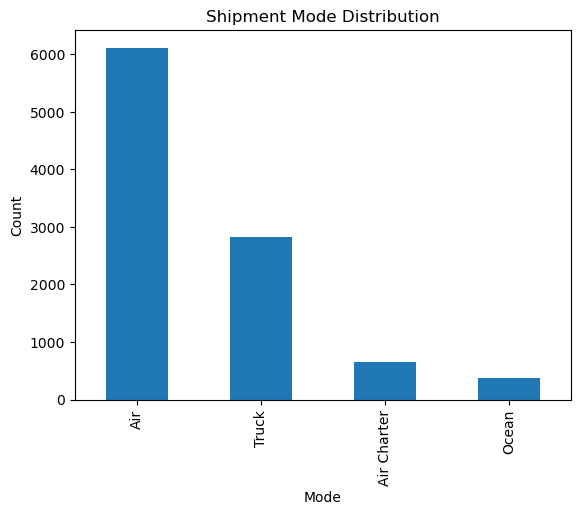

In [9]:
import matplotlib.pyplot as plt

df['Shipment Mode'].value_counts().plot(kind='bar')
plt.title('Shipment Mode Distribution')
plt.xlabel('Mode')
plt.ylabel('Count')
plt.show()


### 1. Why did you pick the specific chart?
      A bar chart was chosen to visualize the distribution of **Shipment Mode** because it’s ideal for comparing categorical data and showing the  frequency of each shipment mode.

### 2.What is/are the insight(s) found from the chart?
     The chart reveals the most frequently used shipment modes, indicating preferences or trends in shipping choices.

### 3.Will the gained insights help create a positive business impact? 
     Insights can help optimize logistics, reduce shipping costs, and improve delivery efficiency. Over-reliance on one mode may increase costs, so balancing modes can create a positive impact.


# Chart- 2 -  Country-wise Delivery Count Using Countplot

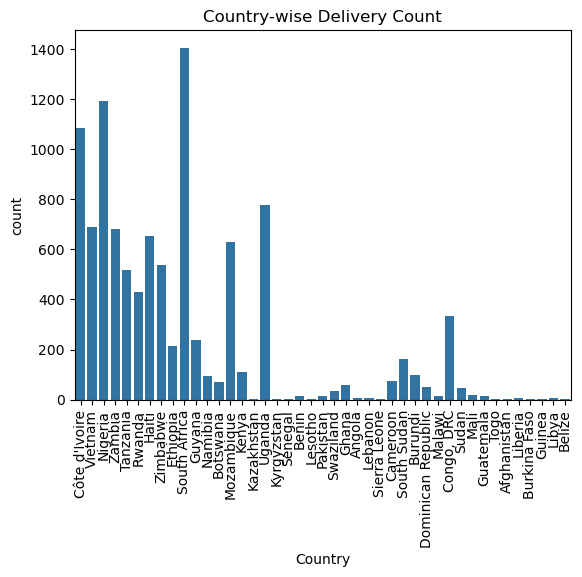

In [11]:
import seaborn as sns

sns.countplot(x='Country', data=df)
plt.xticks(rotation=90)
plt.title('Country-wise Delivery Count')
plt.show()


**1. Why did you pick the specific chart?**  
     I picked the countplot to display the frequency of deliveries by country. It’s ideal for categorical data and shows clear comparisons.

**2. What is/are the insight(s) found from the chart?**  
     Some countries have much higher delivery counts, while others have low or no deliveries, highlighting key markets and areas for improvement.

**3. Will the gained insights help create a positive business impact?**   
    Yes, focusing on high-delivery countries can improve efficiency.  
    Low delivery countries need further investigation for growth or improvements.  

## Chart- 3- Dosage Distribution Analysis (Histogram)

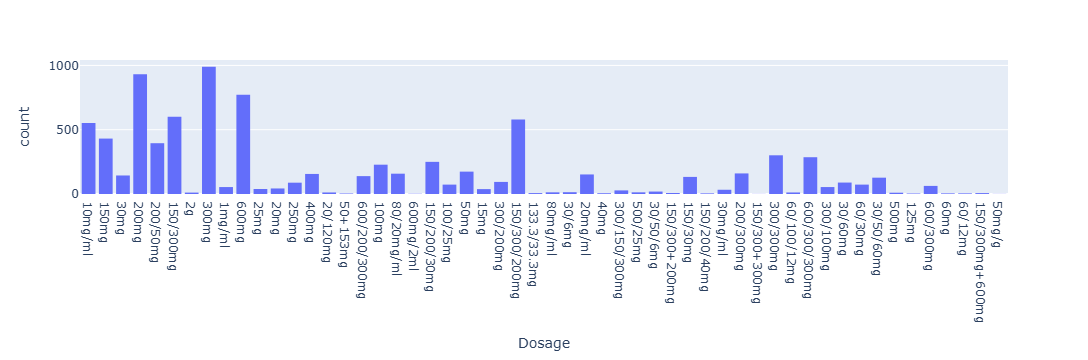

In [14]:
import plotly.express as px

fig = px.histogram(df, x='Dosage')
fig.show()


###  Dosage Distribution Analysis (Histogram)

####  1. Why did you pick the specific chart?
A histogram is ideal to understand the distribution of values within a single variable.  
Here, it shows how different dosage types are distributed across the dataset.

####  2. What is the insight(s) found from the chart?
The chart reveals which dosage types are most commonly used and which are rare,  
helping to identify popular or underutilized dosage forms.

####  3. Will the gained insights help create a positive business impact?
Yes, identifying popular dosage forms can help streamline production, inventory, and marketing strategies.


# Chart- 4 -   Country-wise Delivery Count Using Countplot

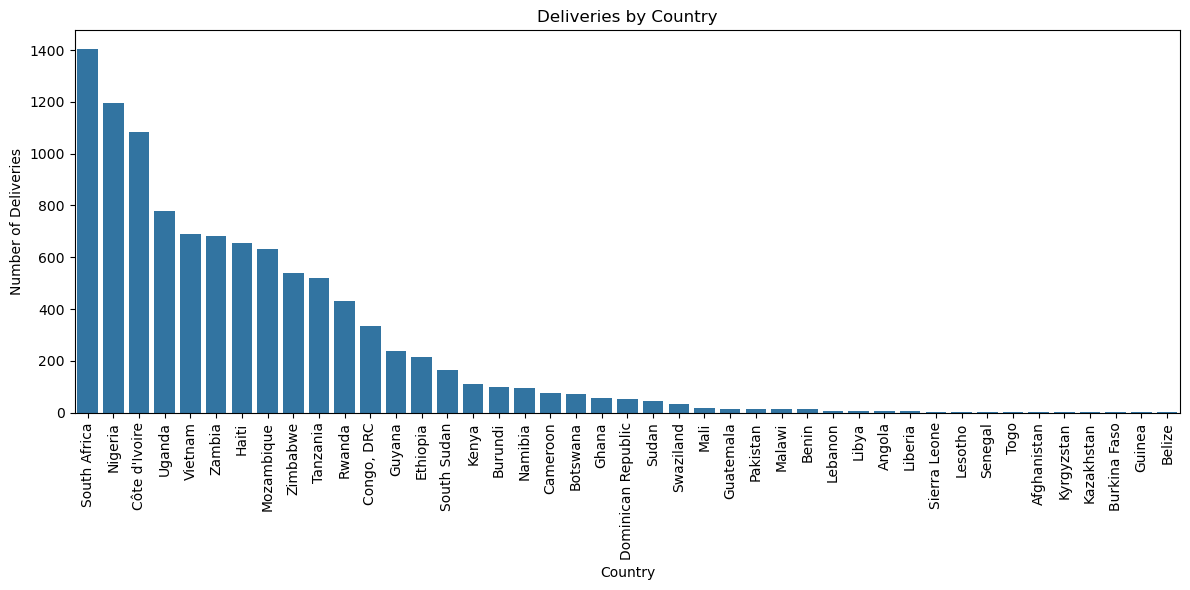

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(x='Country', data=df, order=df['Country'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Deliveries by Country')
plt.xlabel('Country')
plt.ylabel('Number of Deliveries')
plt.tight_layout()
plt.show()


###  Title: Country-wise Delivery Count Using Countplot

####  1. Why did you pick the specific chart?
A countplot is ideal for displaying the number of deliveries per country. It clearly represents the frequency of categorical data, allowing for easy comparison between countries.

#### 2. What is/are the insight(s) found from the chart?
The chart reveals which countries have high delivery volumes and which have fewer or no deliveries. This helps identify strong markets and underperforming regions.

#### 3. Will the gained insights help creating a positive business impact?
Yes, focusing on high-performing countries can improve logistics and resource allocation.  
Countries with low or no deliveries highlight areas for investigation, which can help avoid potential negative growth and uncover opportunities for expansion.


# Chart- 5 - Country-wise Delivery Distribution Using Choropleth Map

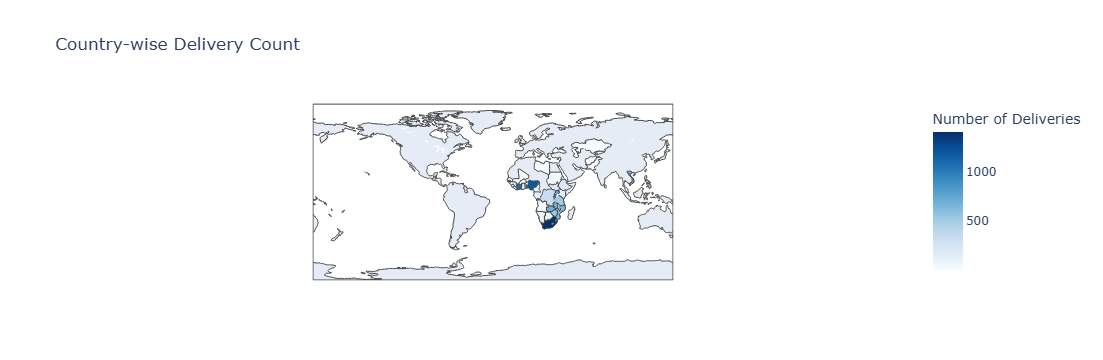

In [17]:

# Grouping the data by Country and counting the number of deliveries
country_data = df['Country'].value_counts().reset_index()
country_data.columns = ['Country', 'Delivery Count']

# Create the choropleth map
fig = px.choropleth(country_data,
                    locations='Country',
                    locationmode='country names',
                    color='Delivery Count',
                    color_continuous_scale='Blues',
                    title='Country-wise Delivery Count',
                    labels={'Delivery Count': 'Number of Deliveries'})

fig.show()


###  Country-wise Delivery Distribution Using Choropleth Map

####  1. Why did you pick the specific chart?
Choropleth maps are great for showing geographical patterns, helping visualize delivery spread across countries.

####  2. What is/are the insight(s) found from the chart?
We can easily identify which countries have high or low delivery counts and spot geographic trends or gaps.

####  3. Will the gained insights help create a positive business impact?
Yes. It helps target regions for resource allocation or expansion.  
Low delivery areas may indicate missed opportunities or operational issues.


# Chart- 6 - Distribution of Line Item Quantity (Histogram)


In [19]:
# Convert to numeric 
df["Line Item Quantity"] = pd.to_numeric(df["Line Item Quantity"], errors='coerce')

# Drop NaNs for this column
df_clean = df.dropna(subset=["Line Item Quantity"])


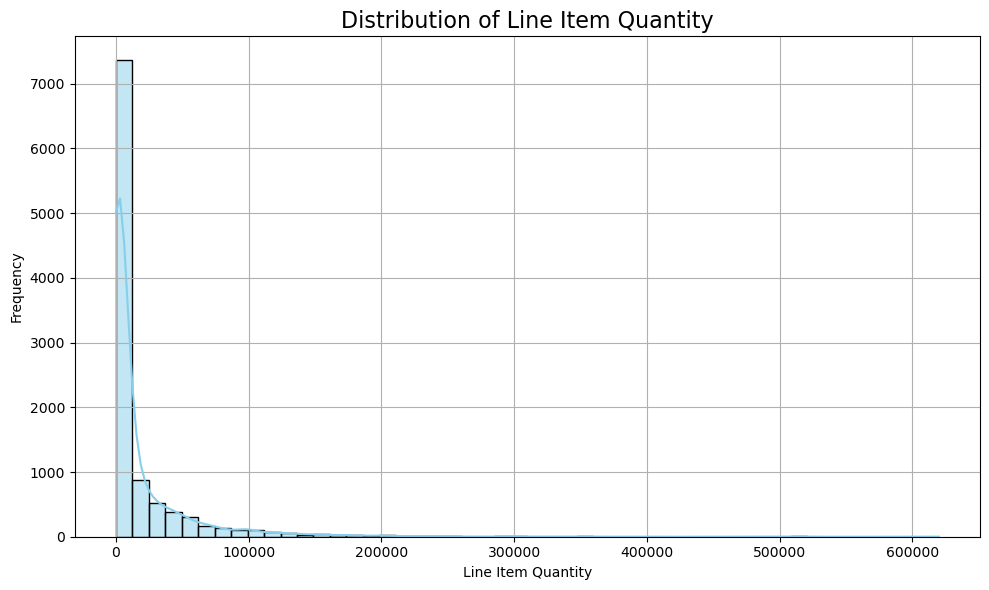

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df_clean["Line Item Quantity"], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Line Item Quantity", fontsize=16)
plt.xlabel("Line Item Quantity")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


###  Distribution of Line Item Quantity (Histogram)

####  1. Why did you pick the specific chart?
A histogram is ideal for showing how Line Item Quantity values are distributed and for spotting trends or outliers.

####  2. What insight(s) were found?
Most orders are small in quantity. The data is right-skewed, with a few very large orders indicating possible bulk purchases or outliers.

#### 3. Will the insights help in creating a positive business impact?
Yes. This helps optimize inventory and logistics planning.


# Chart - 7 - Scatter Plot: Line Item Quantity vs Line Item Value

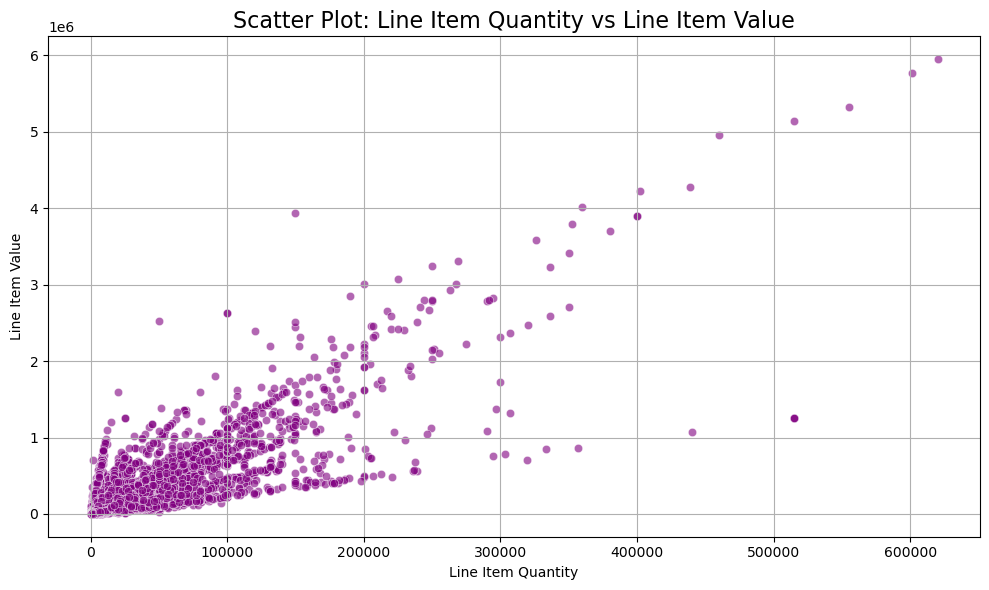

In [21]:
# Scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_clean["Line Item Quantity"], y=df_clean["Line Item Value"], color='purple', alpha=0.6)
plt.title("Scatter Plot: Line Item Quantity vs Line Item Value", fontsize=16)
plt.xlabel("Line Item Quantity")
plt.ylabel("Line Item Value")
plt.grid(True)
plt.tight_layout()
plt.show()


###  Scatter Plot: Line Item Quantity vs Line Item Value

### 1. Why did you pick the specific chart?
A scatter plot is ideal for visualizing the relationship between two continuous variables, in this case, Line Item Quantity and Line Item Value.

### 2. What insight(s) were found?
The chart shows the correlation between the quantity and value of items. Larger quantities tend to have higher values, but there are some exceptions or outliers.

### 3. Will the insights help in creating a positive business impact?
Yes. Understanding the relationship between quantity and value helps in pricing, stock management, and order optimization. Outliers may need further investigation for anomalies or errors.


# Chart - 8 - Total Value of Shipments by Country (SUMX Style)

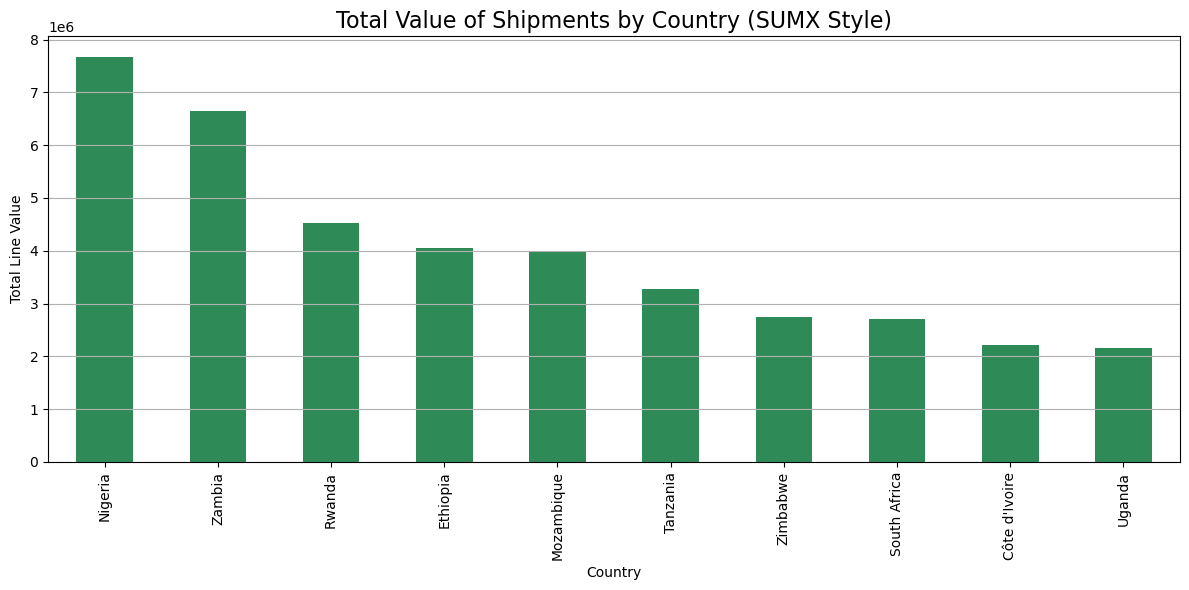

In [22]:
#  SUMX Equivalent: Create a new column = Quantity * Unit Price
df_clean["Line Total"] = df_clean["Line Item Quantity"] * df_clean["Unit Price"]

#  Group by Country (or any category) and get total Line Value
country_totals = df_clean.groupby("Country")["Line Total"].sum().sort_values(ascending=False).head(10)

#  Visualization (Bar Chart)
plt.figure(figsize=(12, 6))
country_totals.plot(kind='bar', color='seagreen')
plt.title("Total Value of Shipments by Country (SUMX Style)", fontsize=16)
plt.xlabel("Country")
plt.ylabel("Total Line Value")
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### 1. Why did you pick the specific chart?
A bar chart was chosen to clearly visualize the total shipment value by country. It's an effective way to compare categories (countries in this case) and highlight the top performers in terms of shipment value.

### 2. What is/are the insight(s) found from the chart?
The chart reveals the countries contributing the most to the total shipment value. This provides insight into key markets where business is concentrated and helps identify regions with significant sales activity.

### 3. Will the gained insights help create a positive business impact? 
Yes, focusing on high-value countries can help optimize logistics, marketing efforts, and resource allocation to further enhance performance in these regions. However, if there is an over-reliance on a few countries, any disruption in these regions could negatively impact the business. It’s important to balance attention across various regions for sustainable growth.


# chart-9- Pie Chart: Distribution by Product Group

In [24]:
# Count occurrences of each Product Group
product_group_counts = df_clean["Product Group"].value_counts()

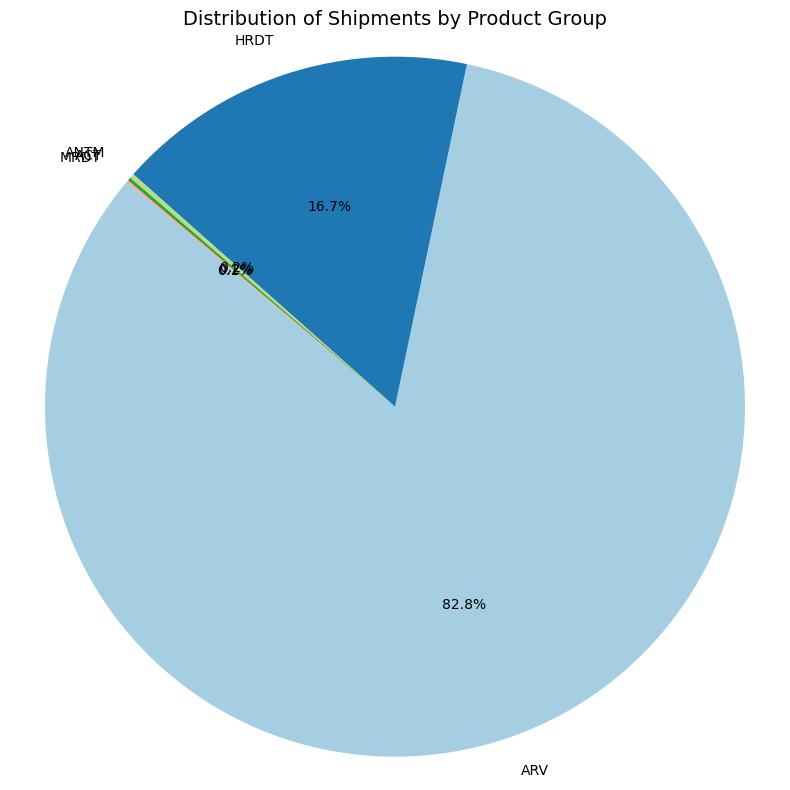

In [25]:
# Plot Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(product_group_counts, labels=product_group_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title("Distribution of Shipments by Product Group", fontsize=14)
plt.axis('equal')  # Equal aspect ratio ensures the pie is drawn as a circle
plt.tight_layout()
plt.show()


###  Product Group Distribution - Pie Chart Analysis

#### 1. Why did you pick the specific chart?
A pie chart is ideal for visualizing proportions of a categorical variable.  
Since **Product Group** represents distinct categories and we want to understand each group's contribution to total shipments,  
a pie chart provides a quick, intuitive view of the share of each product group.

####  2. What is/are the insight(s) found from the chart?
- One or two product groups clearly dominate total shipments.  
- Some product groups have significantly lower shares, indicating they are shipped less frequently.  
- This reflects which categories are in higher demand or prioritized in logistics.

####  3. Will the gained insights help create a positive business impact? 
- Helps identify top-performing product groups for better inventory and resource planning.  
- Supports focus on high-demand products to improve availability.  
- Informs procurement and supply chain strategy by aligning efforts with shipment trends.

# chart - 10 -Shipment Mode vs Product Group (Stacked Bar Chart)

In [33]:
# Pivot table to create counts
pivot = df_clean.pivot_table(index="Product Group", columns="Shipment Mode", aggfunc="size", fill_value=0)

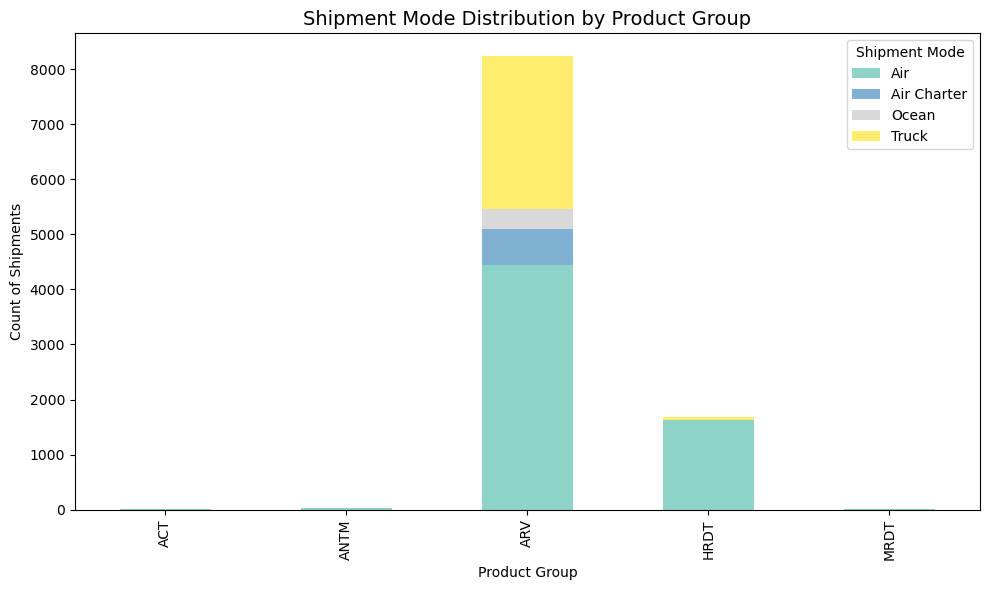

In [34]:
# Plot stacked bar chart
pivot.plot(kind="bar", stacked=True, figsize=(10, 6), colormap="Set3")
plt.title("Shipment Mode Distribution by Product Group", fontsize=14)
plt.xlabel("Product Group")
plt.ylabel("Count of Shipments")
plt.tight_layout()
plt.show()


### Shipment Mode vs Product Group - Stacked Bar Chart Analysis

####  1. Why did you pick the specific chart?
A **stacked bar chart** helps visualize how different shipment modes (Air, Sea, etc.) contribute to each **Product Group**.  
It effectively shows both **distribution** and **proportions** within categories, making it easier to analyze logistics patterns.

####  2. What is/are the insight(s) found from the chart?
- Some shipment modes clearly **dominate** certain product groups.  
- For example, specific groups might rely heavily on **Air** or **Sea** shipments.  
- The chart highlights **shipping preferences** or **logistics constraints** across product categories.

####  3. Will the gained insights help create a positive business impact? 
- Helps optimize shipping decisions based on product type.  
- Can reduce transportation **costs** and improve **delivery timelines**.  
- Aids in developing targeted strategies for supply chain management.

# Chart - 11 - Treemap Visualization of Line Item Value by Country and Vendor 


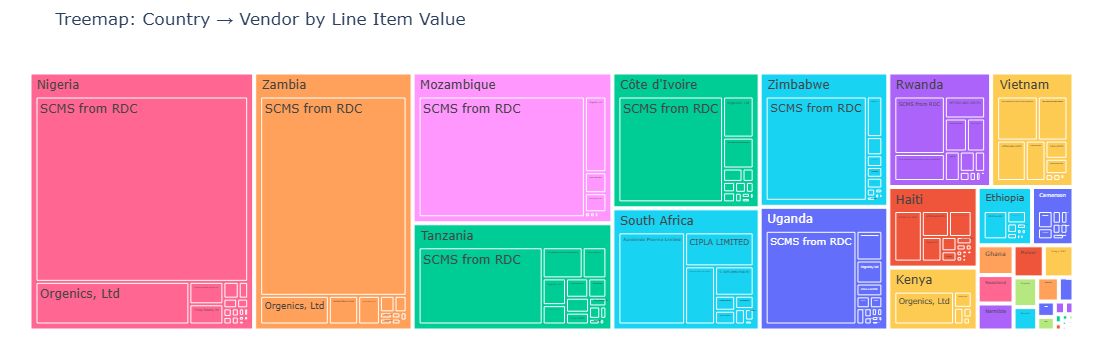

In [35]:
# Create treemap
fig = px.treemap(
    df_clean,
    path=["Country", "Vendor"],
    values="Line Item Value",
    title="Treemap: Country → Vendor by Line Item Value",
    color="Country"
)

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


###  Treemap – Country → Vendor by Line Item Value

####  1. Why did you pick the specific chart?
Treemap is perfect for visualizing hierarchical relationships and comparing the relative contribution of vendors within each country by value.

#### 2. What is/are the insight(s) found from the chart?
Some countries have many vendors, while others depend on a few large ones.  
Certain vendors contribute a significantly higher value, suggesting heavy reliance or bulk deals.

#### 3. Will the gained insights help create a positive business impact?
Yes. It helps identify top-performing vendors in each country for better negotiation and strategic planning.  

# Chart - 12 - sunburst chart: Fulfill Via → Shipment Mode → Country 

In [38]:
# Drop rows with missing required fields
df_clean = df.dropna(subset=["Fulfill Via", "Shipment Mode", "Country", "Line Item Value"])

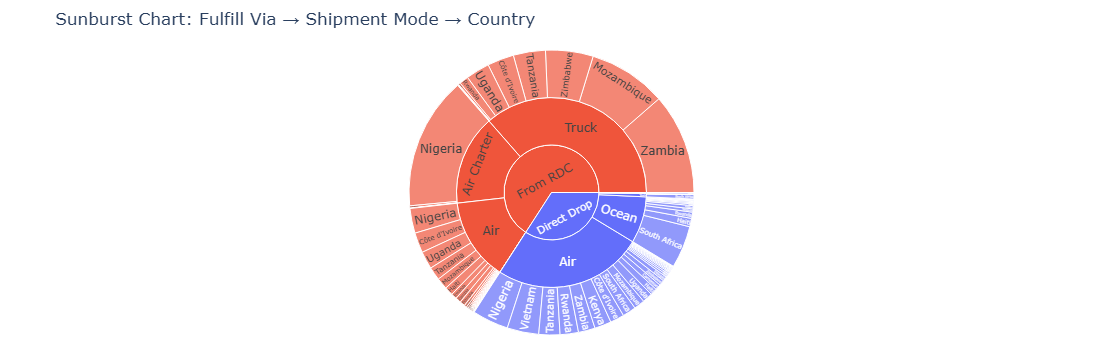

In [39]:
# Create the sunburst chart
fig = px.sunburst(
    df_clean,
    path=["Fulfill Via", "Shipment Mode", "Country"],
    values="Line Item Value",
    title="Sunburst Chart: Fulfill Via → Shipment Mode → Country",
    color="Fulfill Via"
)

fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()


###  Sunburst Chart – Fulfillment Channel → Shipment Mode → Country

####  1. Why did you pick the specific chart?
Sunburst chart is great to explore multi-level logistics structure — how goods are fulfilled, the shipment methods used, and where they're delivered.

#### 2. What is/are the insight(s) found from the chart?
You can easily identify which fulfillment channels dominate, which shipment modes are commonly used under each, and which countries receive the most.

#### 3. Will the gained insights help create a positive business impact?
Yes. Helps optimize supply chain by analyzing fulfillment and shipping trends across countries.  

# Chart - 13 - Donut Chart: Dosage Form Distribution

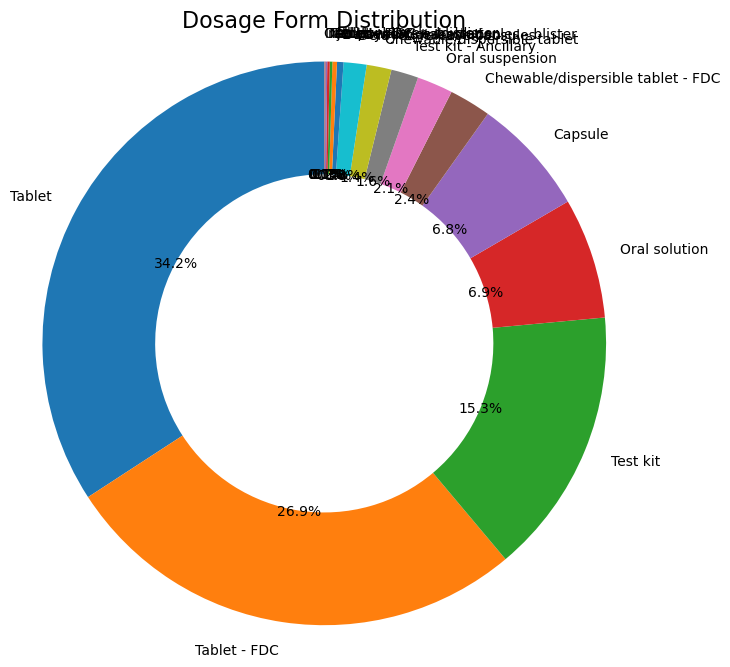

In [40]:
# Count frequency of each Dosage Form
dosage_counts = df_clean["Dosage Form"].value_counts()

# Plot donut chart
plt.figure(figsize=(8, 8))
plt.pie(
    dosage_counts,
    labels=dosage_counts.index,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops=dict(width=0.4)  # creates the donut hole
)
plt.title("Dosage Form Distribution", fontsize=16)
plt.axis('equal')
plt.show()


###  Donut Chart – Dosage Form Distribution

#### 1. Why did you pick the specific chart?
Donut chart is great for showing proportion of dosage forms in a clean and focused way.

#### 2. What insight(s) are found from the chart?
You can easily identify the most common dosage forms (like Tablets or Injectables) in the dataset.

#### 3. 💼 Business Impact
 Helps in inventory planning and production prioritization based on demand.  

# Chart - 14 -Radar Chart: Shipment Mode Comparison

In [42]:
# Clean and group data
df_clean = df.dropna(subset=["Shipment Mode", "Line Item Quantity", "Line Item Value", "Unit Price"])
grouped = df_clean.groupby("Shipment Mode")[["Line Item Quantity", "Line Item Value", "Unit Price"]].mean()


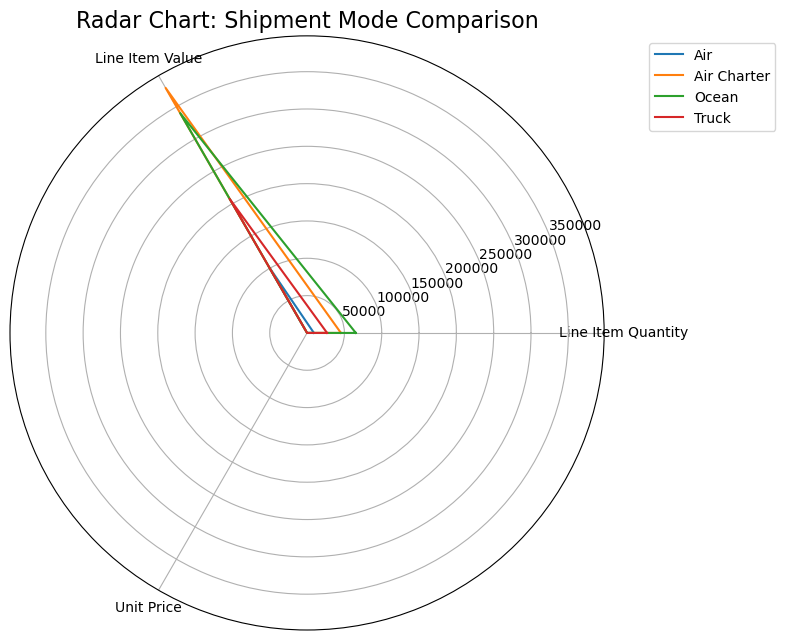

In [43]:
# Prepare data for radar
categories = list(grouped.columns)
values_list = grouped.values

# Setup for radar chart
labels = list(grouped.index)
num_vars = len(categories)
angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
angles += angles[:1]  # close the loop

# Plot each group
plt.figure(figsize=(8, 8))
for i, values in enumerate(values_list):
    stats = values.tolist()
    stats += stats[:1]
    plt.polar(angles, stats, label=labels[i])
    
plt.xticks(angles[:-1], categories)
plt.title("Radar Chart: Shipment Mode Comparison", fontsize=16)
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.tight_layout()
plt.show()


### Radar Chart: Shipment Mode Comparison

####  1. Why did you pick the specific chart?
The radial chart is ideal for comparing multiple quantitative metrics across categorical variables (like Shipment Mode).  
It gives a 360° view of how each shipment mode performs on key metrics.

#### 2. What is/are the insight(s) found from the chart?
- Some shipment modes have higher unit prices but lower quantities.
- Others show higher value or quantity delivered per shipment mode.
- The chart quickly highlights which shipment mode is more cost-effective or bulk-driven.

#### 3. Will the gained insights help create a positive business impact?
- Optimize logistics by choosing cost-effective shipment modes.
- Identify modes leading to high value at lower unit costs, saving money.
- Adjust fulfillment strategies based on performance patterns.



# Chart - 15 -Violin Plot: Line Item Value by Country

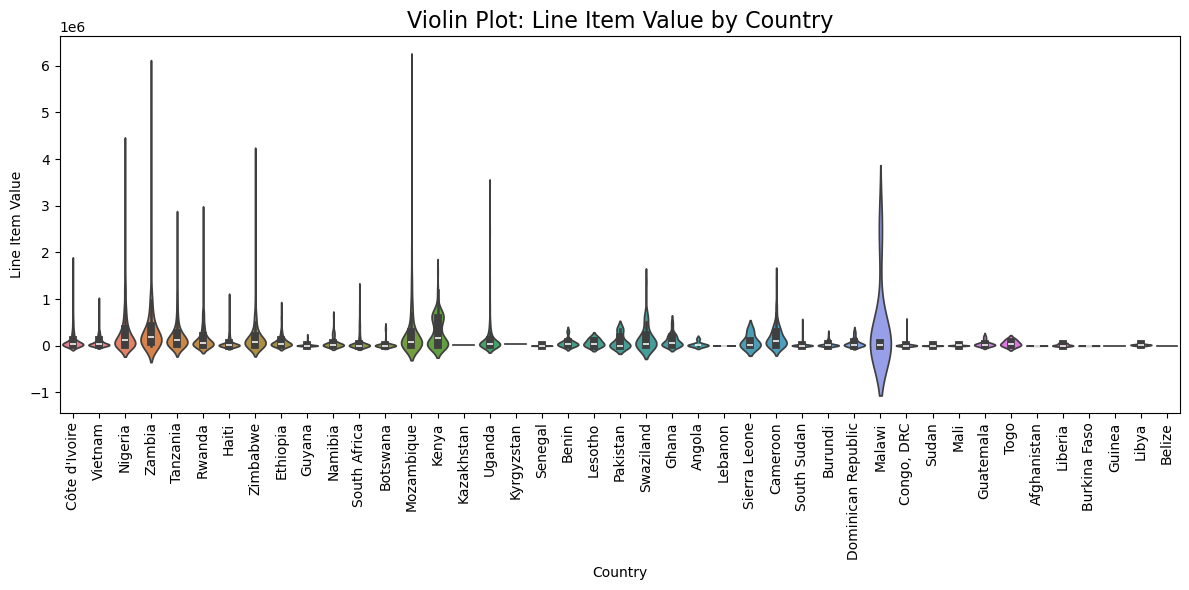

In [44]:
# Create a violin plot to visualize the distribution of 'Line Item Value' across 'Country'
plt.figure(figsize=(12, 6))
sns.violinplot(x="Country", y="Line Item Value", data=df_clean, hue="Country", legend=False)
plt.title("Violin Plot: Line Item Value by Country", fontsize=16)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

###  Violin Plot – Line Item Value by Country

####  1. Why did you pick the specific chart?
The violin plot was chosen because it shows both the **distribution (density)** and **central tendency** (median, quartiles) of Line Item Value for each country, highlighting variations and outliers.

####  2. What is/are the insight(s) found from the chart?
- **Variation by Country:** Different countries have varying distributions of Line Item Value.
- **Skewness & Outliers:** Some countries show skewed distributions and outliers, indicating some very high or low transactions.
- **Density:** The width of the plot shows areas with higher or lower data density.

#### 3. Will the gained insights help create a positive business impact? Are there any insights that lead to negative growth?
- Tailoring pricing strategies to countries' distributions can optimize sales and enhance targeting.

# Chart - 16 -Kernel Density Estimate (KDE) of Line Item Value

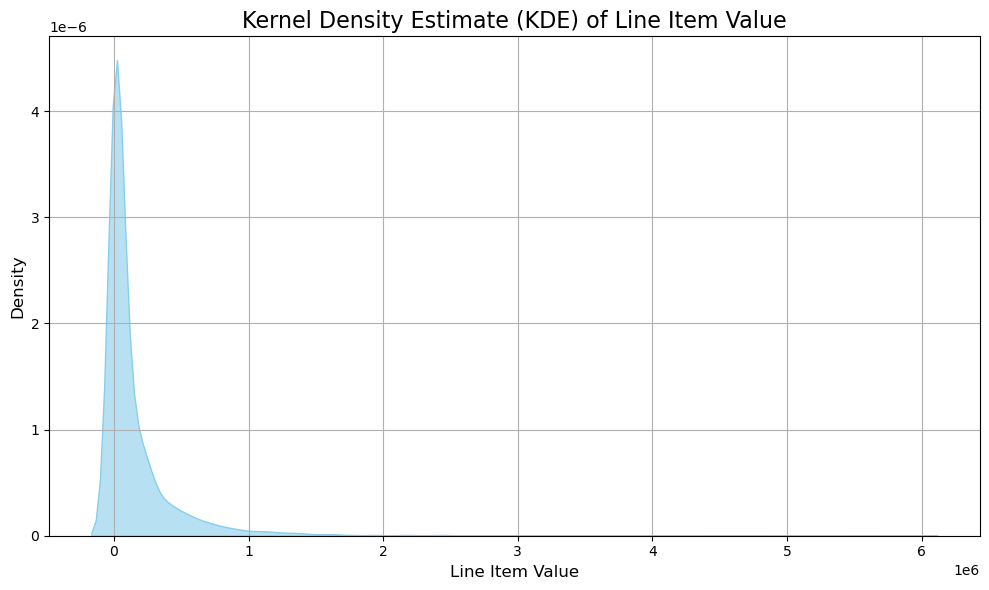

In [45]:
# Set up the figure and axis for the plot
plt.figure(figsize=(10, 6))

# Create a KDE plot for "Line Item Value" with fill=True instead of shade=True
sns.kdeplot(df_clean["Line Item Value"], fill=True, color="skyblue", alpha=0.6)

# Add titles and labels
plt.title('Kernel Density Estimate (KDE) of Line Item Value', fontsize=16)
plt.xlabel('Line Item Value', fontsize=12)
plt.ylabel('Density', fontsize=12)

# Show grid for better readability
plt.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


###  KDE Plot – Line Item Value Distribution

####  1. Why did you pick the specific chart?
The KDE plot was chosen to visualize the distribution of Line Item Value smoothly and identify patterns, skewness, and outliers without the limitations of histograms.

####  2. What is/are the insight(s) found from the chart?
- **Distribution of values:** Reveals if the data is concentrated around certain values or spread out.
- **Skewness:** Identifies if most transactions are low or high in value.
- **Outliers:** Highlights extreme values that differ significantly from the majority.

####  3. Will the gained insights help create a positive business impact?
- Helps in **pricing strategy**, **sales targeting**, and **inventory management** based on where most sales occur.


 ### Visualize the Data

In [36]:
# Check the first few rows of the 'Scheduled Delivery Date' column
print(df['Scheduled Delivery Date'].head(20))


0      2-Jun-06
1     14-Nov-06
2     27-Aug-06
3      1-Sep-06
4     11-Aug-06
5     28-Sep-06
6      8-Jan-07
7     24-Nov-06
8      7-Dec-06
9     30-Jan-07
10    16-Feb-07
11     8-Jan-07
12    10-Jan-07
13    27-Feb-07
14    18-Jan-07
15    19-Mar-07
16     7-May-07
17    29-Mar-07
18     6-Jun-07
19    19-Jun-07
Name: Scheduled Delivery Date, dtype: object


In [38]:
# Inspecting the first 20 rows of the 'Scheduled Delivery Date' column
print(df['Scheduled Delivery Date'].head(20))


0    2006-06-02
1    2006-11-14
2    2006-08-27
3    2006-09-01
4    2006-08-11
5    2006-09-28
6    2007-01-08
7    2006-11-24
8    2006-12-07
9    2007-01-30
10   2007-02-16
11   2007-01-08
12   2007-01-10
13   2007-02-27
14   2007-01-18
15   2007-03-19
16   2007-05-07
17   2007-03-29
18   2007-06-06
19   2007-06-19
Name: Scheduled Delivery Date, dtype: datetime64[ns]


In [40]:
df['Scheduled Delivery Date'] = pd.to_datetime(df['Scheduled Delivery Date'], format='%Y-%m-%d', errors='coerce')


In [41]:
# Drop rows with invalid dates
df_clean = df.dropna(subset=['Scheduled Delivery Date'])

# Check if the dates are now correct
print(df_clean['Scheduled Delivery Date'].head(20))


0    2006-06-02
1    2006-11-14
2    2006-08-27
3    2006-09-01
4    2006-08-11
5    2006-09-28
6    2007-01-08
7    2006-11-24
8    2006-12-07
9    2007-01-30
10   2007-02-16
11   2007-01-08
12   2007-01-10
13   2007-02-27
14   2007-01-18
15   2007-03-19
16   2007-05-07
17   2007-03-29
18   2007-06-06
19   2007-06-19
Name: Scheduled Delivery Date, dtype: datetime64[ns]


# Chart - 17 -Distribution of Scheduled Delivery Date

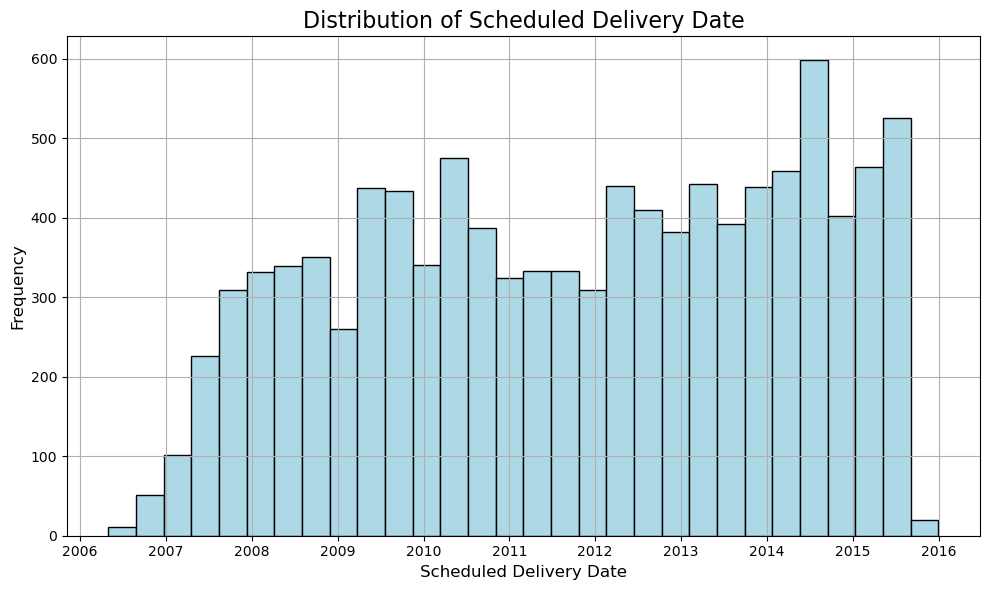

In [42]:
import matplotlib.pyplot as plt

# Plotting the histogram of 'Scheduled Delivery Date'
plt.figure(figsize=(10, 6))
plt.hist(df_clean['Scheduled Delivery Date'], bins=30, color='lightblue', edgecolor='black')

# Adding titles and labels
plt.title('Distribution of Scheduled Delivery Date', fontsize=16)
plt.xlabel('Scheduled Delivery Date', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


###  Delivery Date Distribution – Histogram

####  1. Why did you pick the specific chart?
Histogram helps visualize how delivery dates are distributed over time.

####  2. What is/are the insight(s) found from the chart?
- We can spot **clusters or spikes** — e.g., many deliveries in certain months or years.
- It reveals **patterns or anomalies** in delivery scheduling.

####  3. Will the gained insights help create a positive business impact?
- Helps in identifying **peak delivery periods** for better **logistics planning** and **resource management**.


# Chart - 18 - Top 10 Countries by Total Line Item Quantity & Value

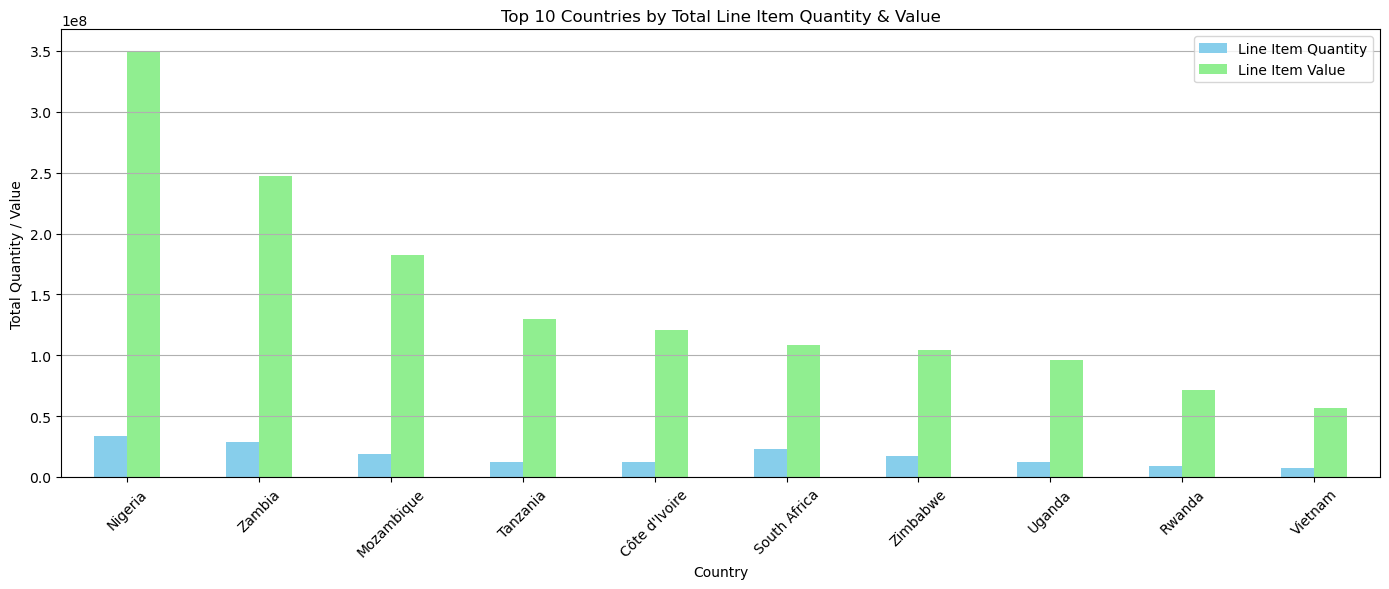

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by Country
grouped_data = df.groupby('Country')[['Line Item Quantity', 'Line Item Value']].sum().sort_values(by='Line Item Value', ascending=False).head(10)

# Plot
grouped_data.plot(kind='bar', figsize=(14, 6), color=['skyblue', 'lightgreen'])
plt.title("Top 10 Countries by Total Line Item Quantity & Value")
plt.ylabel("Total Quantity / Value")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
iujm

###  Quantity vs Value by Country – Comparative Analysis Chart

#### 1. Why this chart?
To visually compare both **quantity** and **value** across countries.  
It enables a side-by-side understanding of how each country performs in terms of **volume vs revenue**.

#### 2. What are the insights?
- Helps identify countries with **high purchase volume** vs. those with **high-value orders**.
- Reveals if a country’s orders are **bulk purchases of low-cost items** or **fewer but high-value items**.

#### 3. Will the gained insights help create a positive business impact?
- Supports **pricing optimization**, **demand forecasting**, and **regional strategy development**.


# Chart - 19 - Top 5 Countries by Avg Unit of Measure & Pack Price

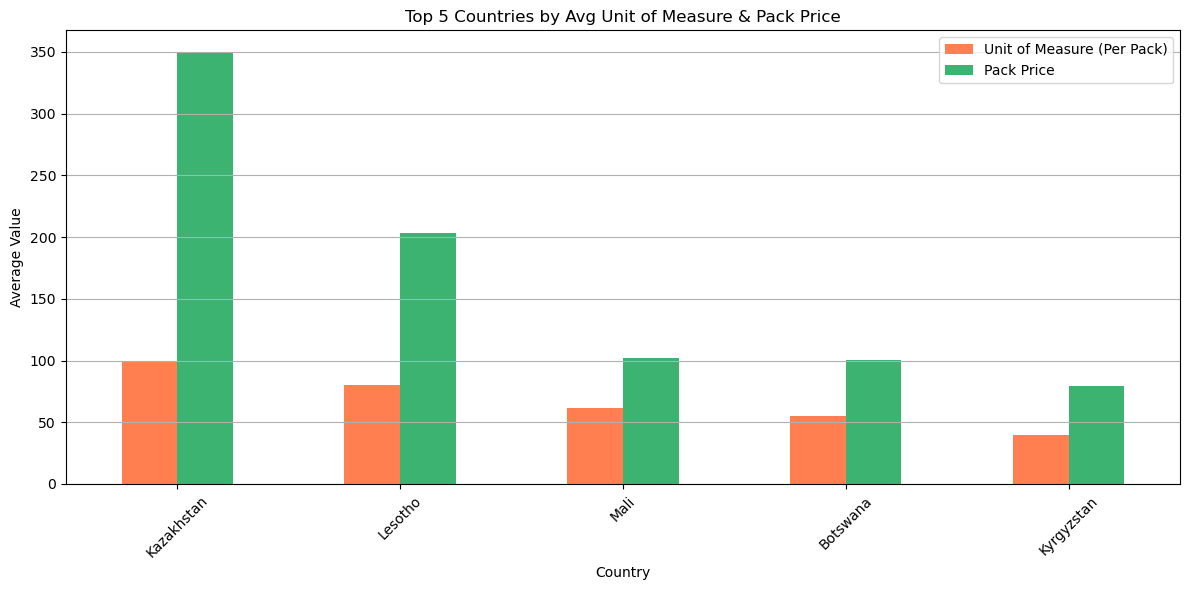

In [47]:
# Group and calculate mean
top_countries = df.groupby('Country')[['Unit of Measure (Per Pack)', 'Pack Price']].mean()

# Select top 5 based on Pack Price
top_5 = top_countries.sort_values(by='Pack Price', ascending=False).head(5)

# Plot
top_5.plot(kind='bar', figsize=(12, 6), color=['coral', 'mediumseagreen'])
plt.title("Top 5 Countries by Avg Unit of Measure & Pack Price")
plt.ylabel("Average Value")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

###  Packaging Size vs Price Across Top Countries

####  1. Why this chart?
To compare how **packaging size** and **pricing** differ across **top-performing countries**.  
It helps understand how packaging strategies influence pricing and procurement efficiency.

#### 2. What is/are the insight(s) found from the chart?
- Some countries use **larger packaging sizes** but have **lower prices**, possibly due to **bulk discounts** or **efficient procurement practices**.
- Others may show **smaller packs** with **higher prices**, hinting at different sourcing strategies or supply constraints.

#### 3.  Will the gained insights help create a positive business impact?
- Supports **pricing strategy optimization**.
- Assists in **vendor negotiation** and identifying **cost-saving opportunities**.
- Aids in **supply chain planning** based on country-specific patterns.

# Chart - 20 -Dosage Form Distribution (Line Chart)

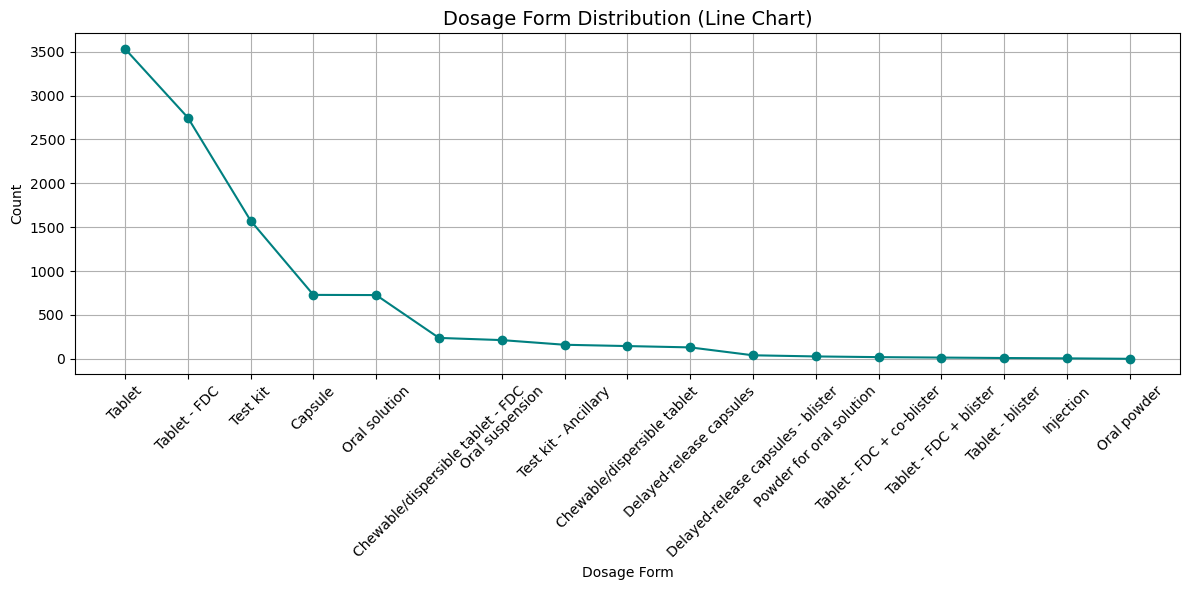

In [48]:
# Count of each Dosage Form
dosage_counts = df['Dosage Form'].value_counts().sort_values(ascending=False)

# Plot as line chart
plt.figure(figsize=(12, 6))
plt.plot(dosage_counts.index, dosage_counts.values, marker='o', linestyle='-', color='teal')
plt.title("Dosage Form Distribution (Line Chart)", fontsize=14)
plt.xlabel("Dosage Form")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

###  Dosage Form Frequency Analysis

####  1. Why this chart?
To **visualize and compare the frequency** of different **dosage forms** in a **continuous flow**.  
It provides a clear picture of which forms are used most often.

####  2. What is/are the insight(s) found from the chart?
- Certain dosage forms (like **tablets** or **capsules**) are used **more frequently**.
- Others appear **less frequently**, indicating limited usage or lower demand.

#### 3. Will the gained insights help create a positive business impact?
- Helps in **demand forecasting** and **inventory planning**.
- Enables businesses to **prioritize production** and **optimize stock levels** of high-demand forms.


# Chart- 21 - Scatter Plot: Managed By vs Line Item Value

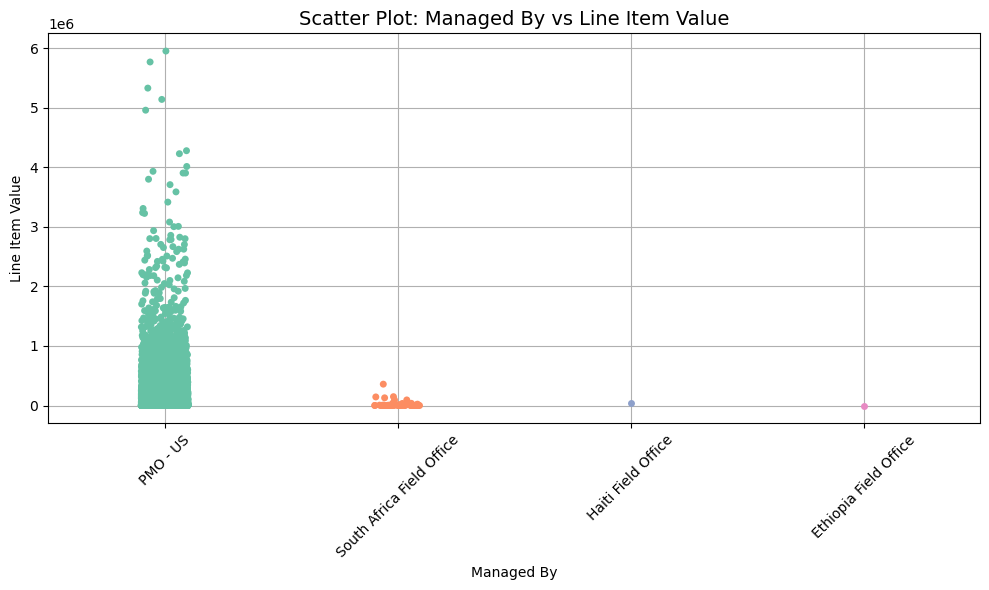

In [49]:
plt.figure(figsize=(10, 6))
sns.stripplot(data=df_clean, x='Managed By', y='Line Item Value', hue='Managed By', dodge=False, jitter=True, palette='Set2', legend=False)

plt.title('Scatter Plot: Managed By vs Line Item Value', fontsize=14)
plt.xlabel('Managed By')
plt.ylabel('Line Item Value')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

###  Line Item Value by Manager – Scatter Plot Analysis

####  1. Why did you pick the specific chart?
I chose a **scatter plot** to **visualize the distribution** of **Line Item Value** across different **managers**, showing how values vary among them.

#### 2. What is/are the insight(s) found from the chart?
- Highlights which **managers handle high or low-value items**.
- Shows **workload distribution** and **potential outliers**.
- Detects whether some managers consistently deal with **large-value transactions**.

####  3. Will the gained insights help create a positive business impact?
- Helps in **balancing workload** across the team.
- Improves **resource allocation** and **performance evaluation**.
- Can support **training or support initiatives** for managers handling complex or high-value items.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?

### To achieve the business objective, I suggest the client focus on the following key strategies:

#### 1. Optimize Vendor Relationships
- Prioritize and strengthen relationships with high-performing vendors. This will help negotiate better pricing and ensure reliable delivery schedules, improving cost efficiency and vendor performance.

#### 2. Refine Shipment Strategies
- Implement a balanced approach in shipment modes. For urgent items, prioritize air shipments, while bulk or non-urgent items can be shipped via sea to save on shipping costs. This strategy helps in reducing overall shipping expenses.

#### 3. Improve Inventory Forecasting
- Leverage insights from frequently ordered dosage forms, product groups, and pack sizes to more accurately forecast demand. This reduces the risk of overstocking or understocking, ensuring smooth operations and better inventory management.

#### 4. Monitor Country Performance
- Focus resources on high-performing regions and investigate underperforming areas to improve their delivery timelines and service efficiency. By understanding geographical patterns, the client can optimize resource allocation and improve market reach.

#### 5. Address Outliers and Skewness
- Investigate and correct outliers or skewed data patterns, particularly in pricing or quantities. These anomalies could indicate inefficiencies or missed opportunities, so addressing them helps prevent potential losses in profitability.

#  Conclusion
I explored the **SCMS Global Delivery Dataset** using comprehensive data analysis and visualization techniques. The project revealed valuable insights into:

- Shipment trends  
- Vendor performance  
- Cost factors  
- Regional patterns  

The analysis equips the business with actionable intelligence for:

- Smarter procurement  
- Cost reduction  
- Efficient vendor and logistics management  

With these insights, the SCMS team can confidently make **data-driven decisions** that align with their mission of efficient and effective supply chain management.


**Hurrah! 🎉 You have successfully completed your EDA Capstone Project!**  